In [3]:
import sys
import pandas as pd
import json
import numpy as np
from helper import *
import argparse
from rsa import RSA
import matplotlib.pyplot as plt
import os

with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

[['girl on the phone in the front'], ['the woman using the cell phone']]
/scratch3/hle/refCOCO/imgs_by_id/298527.jpg


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,hair-1,298527,560905,24656,0.030117,391.855286,242.989685,115.954529,97.281006,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002493,0.002493,0.002495,0.002499,0.002494,0.002493
1,man-1,298527,560905,24656,0.093130,261.369904,106.523911,165.649048,210.573715,0.000624,...,0.002495,0.002494,0.002494,0.002494,0.002494,0.002494,0.002496,0.002494,0.002495,0.002506
2,glasses-1,298527,560905,24656,0.008485,209.653656,357.004272,89.506195,35.504456,0.000624,...,0.002508,0.002496,0.002496,0.002494,0.002498,0.002496,0.002497,0.002503,0.002494,0.002494
3,people-1,298527,560905,24656,0.503290,7.081059,101.583115,424.723755,443.827942,0.000624,...,0.002494,0.002494,0.002494,0.002494,0.002494,0.002494,0.002497,0.002494,0.002495,0.002497
4,camera-1,298527,560905,24656,0.004120,0.207293,223.890457,25.399651,60.747147,0.000624,...,0.002492,0.002492,0.002492,0.002492,0.002492,0.002492,0.002493,0.002492,0.002496,0.002492
5,jacket-1,298527,560905,24656,0.109267,188.412689,425.296600,219.199799,186.703400,0.000624,...,0.002494,0.002493,0.002496,0.002493,0.002493,0.002493,0.002496,0.002496,0.002495,0.002493
6,man-2,298527,560905,24656,0.089464,118.016823,57.547909,124.898781,268.282501,0.000624,...,0.002496,0.002494,0.002494,0.002494,0.002494,0.002494,0.002499,0.002496,0.002495,0.002519
7,face-1,298527,560905,24656,0.029085,203.680283,324.648956,101.427780,107.402893,0.000624,...,0.002506,0.002494,0.002497,0.002494,0.002498,0.002495,0.002499,0.002501,0.002495,0.002496
8,seat-1,298527,560905,24656,0.152401,292.089722,432.203949,317.476013,179.796051,0.000624,...,0.002493,0.002493,0.002493,0.002492,0.002493,0.002494,0.002502,0.002493,0.002493,0.002493
9,shirt-1,298527,560905,24656,0.103401,356.461792,335.457001,240.665588,160.921051,0.000624,...,0.002491,0.002491,0.002491,0.002491,0.002491,0.002491,0.002492,0.002491,0.002491,0.002492


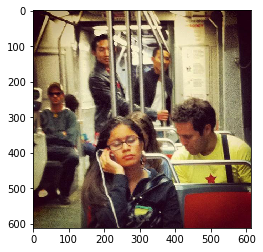

In [14]:
file_id = 22

df = pd.read_csv(os.path.join(data_path,f'refCOCO/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')

with open(os.path.join(data_path,f'refCOCO/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
refs = [[r] for r in label['ref_sents']]
print(refs)
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
df

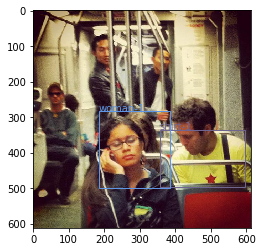

In [20]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[9:11]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax = draw_box_obj(name,x,y,w,h,img,ax)

['girl on the phone in the front', 'the woman using the cell phone']


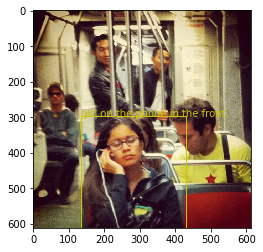

In [16]:
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [17]:
matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)
rsa_agent = RSA(df)
targets = [matched_label[file_id][j][1] for j in range(min(3, len(matched_label[file_id])))]
word_lists = [rsa_agent.full_speaker(target) for target in targets]
expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]

/scratch3/hle/git/rsa_refer/rsa.py:83: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


In [18]:
# the top 3 guesses based on top 3 best match
print(targets)
print(expression)

['jacket-1', 'woman-1', 'people-1']
['jacket', 'woman', 'people']


In [21]:
# True label
print(refs)

[['girl on the phone in the front'], ['the woman using the cell phone']]
